In [1]:
import pandas as pd
import pysftp as sftp
import getpass
import os

In [2]:
passwd = getpass.getpass()

 ········


In [3]:
server = sftp.Connection(
    host = 'efedequis.xyz',
    username = 'ubuntu',
    password = passwd
)

server.get('/tmp/lps_dolar.json')

In [4]:
with sftp.Connection(
    host = 'efedequis.xyz',
    username = 'ubuntu',
    password = passwd
) as servobj:
    server.get('/tmp/lps_dolar.json')

In [5]:
df = pd.read_json('lps_dolar.json', lines=True)
df.tail()

,Fecha,Compra,Venta
6335,2025-03-06T00:00:00.000Z,25.5949,25.7229
6336,2025-03-07T00:00:00.000Z,25.5962,25.7242
6337,2025-03-11T00:00:00.000Z,25.6010,25.7290
6338,2025-03-12T00:00:00.000Z,25.6059,25.7339
6339,2025-03-13T00:00:00.000Z,25.6098,25.7378


In [20]:
last2 = df.iloc[-2:]

In [26]:
last2['Venta'].pct_change().iloc[1], last2['Venta'].diff()

(0.00017525889633640546,
 6320       NaN
 6321    0.0045
 Name: Venta, dtype: float64)

In [27]:
(25.6808 - 25.6763)/25.6763

0.00017525889633631677

In [49]:
def telegram_notification(DF_path):
    # DF_path is the path to the whole data set
    DF = pd.read_json(DF_path, lines=True)
    last2 = DF.iloc[-2:]
    pct_change = last2.Venta.pct_change().iloc[1]*100
    last2days_diff = last2.Venta.diff().iloc[1]
    price_today = last2.Venta.iloc[1]
    arrow = '↗'
    if last2days_diff < 0:
        arrow = '↘'
    return_str = f"Precio: {price_today} | {arrow} |\
 LPS {last2days_diff:.4f} | {pct_change:.3f}%"
    return return_str

In [50]:
telegram_notification('lps_dolar.json')

'Precio: 25.6808 | ↗ | LPS 0.0045 | 0.018%'

In [52]:
os.getcwd()

'/home/luis/code/Stonking/LempiraDolar/Notebooks'

In [1]:
import pandas as pd
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide-2020-12-06.xlsx')

<Axes: >

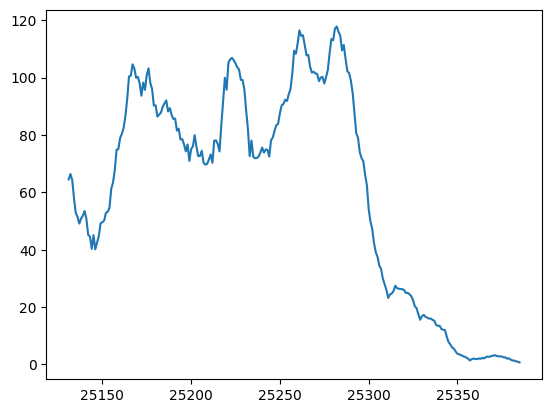

In [7]:
df_hn = df[df.countryterritoryCode=="HND"]
df_hn['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].plot()